In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [2]:
df = pd.read_json("Appliances.json", lines = True)

In [3]:
# initial preprocessing

# Fill missing values in 'style,' 'reviewerName,' 'reviewText,' and 'summary' with empty strings
columns_to_fill = ['style', 'reviewerName', 'reviewText', 'summary']
df[columns_to_fill] = df[columns_to_fill].astype(str)
df[columns_to_fill] = df[columns_to_fill].replace('', np.nan)

# Convert 'vote' to numeric (assuming 'NaN' means 0)
df['vote'] = df['vote'].str.replace(',', '', regex=True).fillna(0).astype(int)

# Convert reviewTime
df['reviewTime'] = pd.to_datetime(df['reviewTime'], format = '%m %d, %Y')

# Delete the 'image' column
df.drop('image', axis=1, inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 602777 entries, 0 to 602776
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   overall         602777 non-null  int64         
 1   vote            602777 non-null  int64         
 2   verified        602777 non-null  bool          
 3   reviewTime      602777 non-null  datetime64[ns]
 4   reviewerID      602777 non-null  object        
 5   asin            602777 non-null  object        
 6   style           602777 non-null  object        
 7   reviewerName    602777 non-null  object        
 8   reviewText      602777 non-null  object        
 9   summary         602777 non-null  object        
 10  unixReviewTime  602777 non-null  int64         
dtypes: bool(1), datetime64[ns](1), int64(3), object(6)
memory usage: 46.6+ MB


In [5]:
# Initialize the lemmatizer and stopwords set
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

In [6]:
# Function to perform lemmatization and remove stopwords
def lemmatize_text(text):
    """
    Perform lemmatization on the input text and remove common English stopwords.

    Parameters:
    text (str): The input text to be lemmatized.

    Returns:
    str: The lemmatized text with stopwords removed.
    """
    words = text.split()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return ' '.join(lemmatized_words)

In [7]:
# Apply lemmatization to 'reviewText' and 'summary' columns
df['reviewText'] = df['reviewText'].apply(lemmatize_text)
df['summary'] = df['summary'].apply(lemmatize_text)

In [8]:
print(df['reviewText'].head(2))  # Display the first few rows of the 'reviewText' column
print("\n", df['summary'].head(2))  # Display the first few rows of the 'summary' column


0    Not one thing book seemed obvious original tho...
1    I enjoyed Dr. Alan Gregerman's weekly blog ([....
Name: reviewText, dtype: object

 0                                Clear lead innovation
1    Becoming innovative opening conversation "stra...
Name: summary, dtype: object


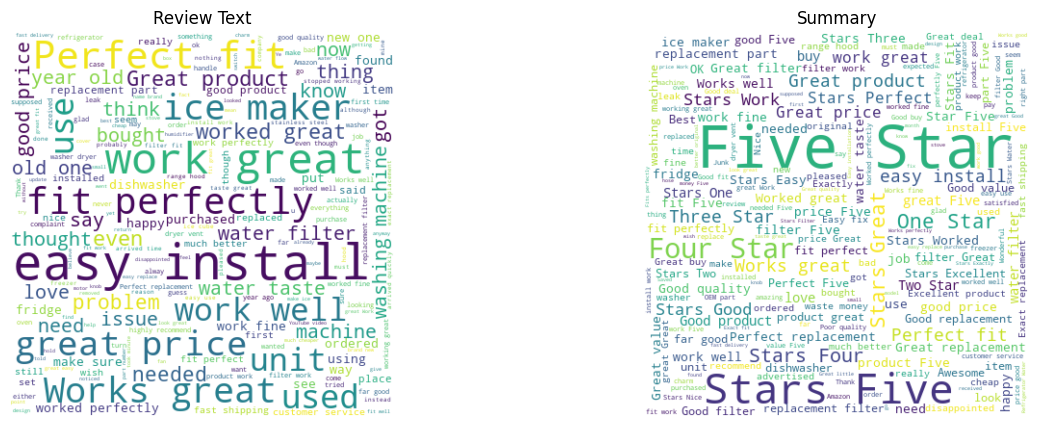

In [9]:
# Visualisation of Lemmatisation results

# Combine lemmatized 'reviewText' and 'summary' into two separate strings
text_review = ' '.join(df['reviewText'])
text_summary = ' '.join(df['summary'])

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Create a word cloud for 'reviewText' and display it in the left subplot
wordcloud_review = WordCloud(width=400, height=400, background_color='white').generate(text_review)
ax1.imshow(wordcloud_review, interpolation='bilinear')
ax1.set_title('Review Text')
ax1.axis('off')

# Create a word cloud for 'summary' and display it in the right subplot
wordcloud_summary = WordCloud(width=400, height=400, background_color='white').generate(text_summary)
ax2.imshow(wordcloud_summary, interpolation='bilinear')
ax2.set_title('Summary')
ax2.axis('off')

plt.show()